In [1]:
%%capture
!pip install -Uqq fastai
!pip install timm

In [2]:
from fastai.vision.all import *
from fastai.data.all import *
import timm

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
path = '/content/gdrive/MyDrive/Colab Notebooks/frames'

In [6]:
def label_func(name):
  return name.parent.name

In [7]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter(),
                   item_tfms = Resize(224),
                   batch_tfms = aug_transforms())

In [8]:
dls = dblock.dataloaders(path)

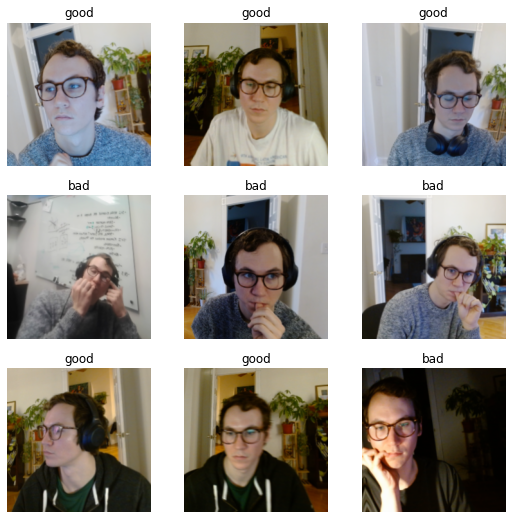

In [ ]:
dls.show_batch()

In [9]:
# learn = vision_learner(dls, 'convnext_small_in22k', metrics=error_rate)
learn = vision_learner(dls, 'edgenext_small', metrics=error_rate)


Downloading: "https://github.com/mmaaz60/EdgeNeXt/releases/download/v1.1/edgenext_small_usi.pth" to /root/.cache/torch/hub/checkpoints/edgenext_small_usi.pth


In [11]:
# learn.lr_find()

In [12]:
learn.fine_tune(5,base_lr = .01)


epoch,train_loss,valid_loss,error_rate,time
0,0.453504,0.210632,0.065020,05:06


epoch,train_loss,valid_loss,error_rate,time
0,0.208536,0.077725,0.032510,01:05
1,0.162441,0.066964,0.024707,01:06
2,0.107606,0.057821,0.022107,01:07
3,0.066743,0.058228,0.019506,01:07
4,0.056001,0.061326,0.023407,01:05


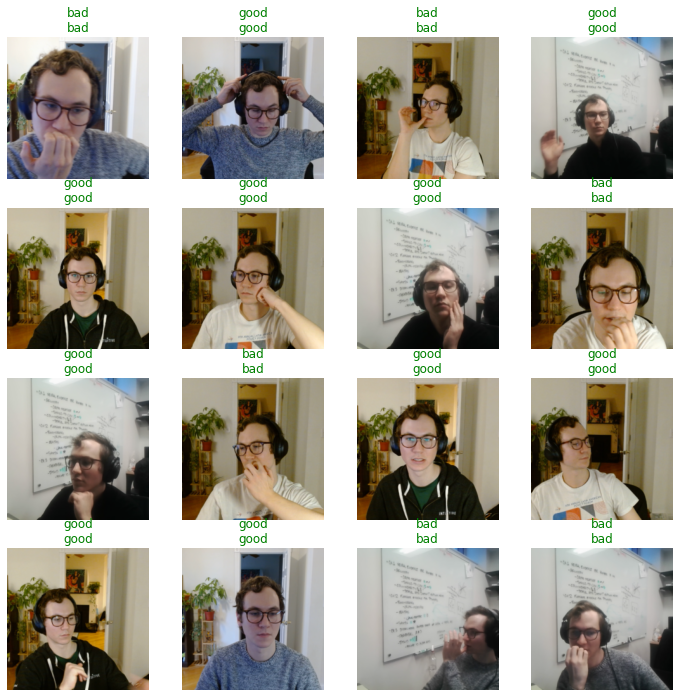

In [13]:
learn.show_results(max_n=16)

In [14]:
learn.export('edgenext_model.pkl')

In [15]:
interp = Interpretation.from_learner(learn)

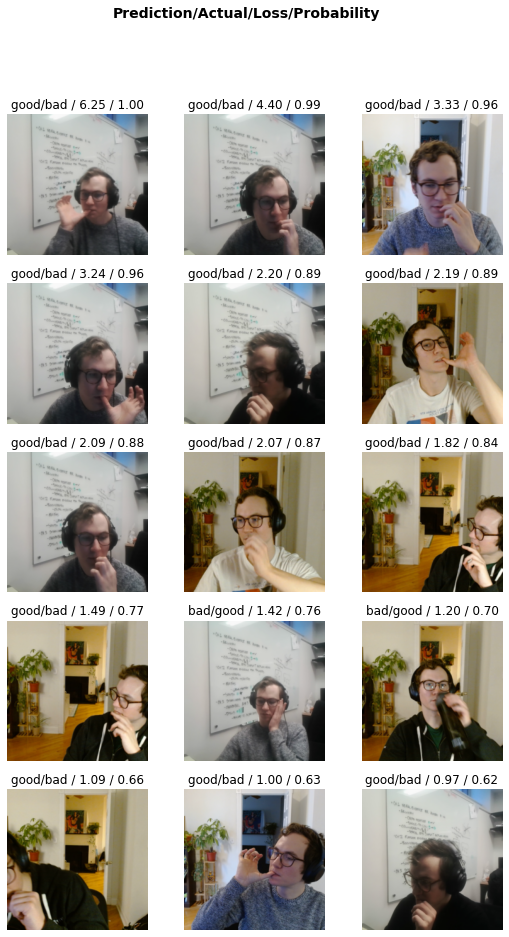

In [16]:
interp.plot_top_losses(15,nrows=5)

In [17]:
cls_interp = ClassificationInterpretation.from_learner(learn)

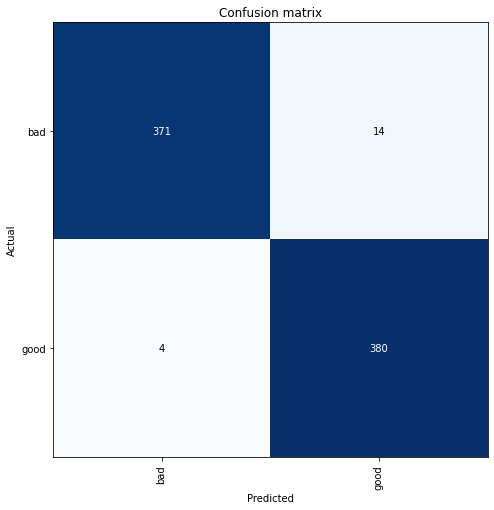

In [18]:
losses,idxs = cls_interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
cls_interp.plot_confusion_matrix(figsize=(7,7))